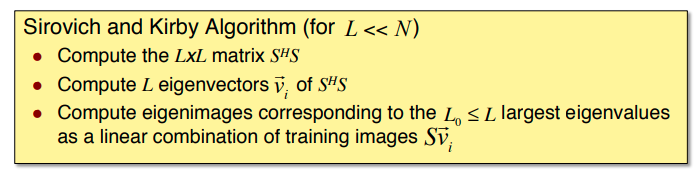

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien'
 'John Ashcroft' 'Junichiro Koizumi' 'Serena Williams' 'Tony Blair']
(1560, 62, 47)


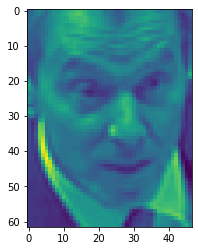

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
plt.grid(False)
faces = fetch_lfw_people(min_faces_per_person=50)
print(faces.target_names)
print(faces.images.shape)
plt.imshow(faces.images[0])

(2914,)
(1560, 2914)


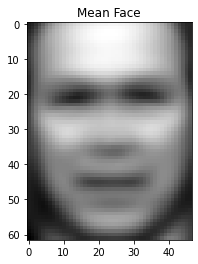

In [ ]:
X = faces.images.reshape(faces.images.shape[0],faces.images.shape[1]*faces.images.shape[2])
mean_face = np.mean(X, axis = 0)
print(mean_face.shape)

plt.imshow(mean_face.reshape(faces.images.shape[1], faces.images.shape[2]),cmap='gray');
plt.title('Mean Face')

### normalization
faces_norm = X - mean_face # Mean Subtracted image
print(faces_norm.shape)

# Here you have to calculate the original covariance matrix
i.e. the size of covariance matrix will be
\begin{align}C = X^\top X\end{align}

In [ ]:
# Calculate covariance matrix
# face_cov = faces_norm.dot(faces_norm.T)/(faces.images.shape[0]-1)
face_cov = np.cov(faces_norm.T)
print(face_cov.shape)

(2914, 2914)


# Find Eigenvectors of the covariance matrix

In [ ]:
eigen_vecs, eigen_vals, _ = np.linalg.svd(face_cov)
print(eigen_vecs.shape)

(2914, 2914)


# Plot Eigenfaces

Text(0.5, 0.98, 'First 10 Eigenfaces')

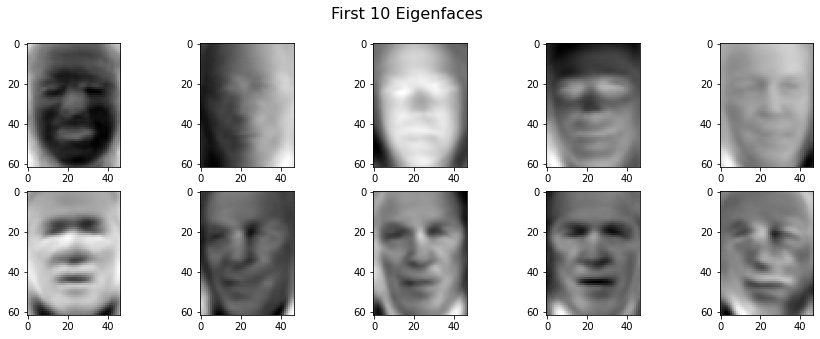

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
for i in np.arange(10):
    ax = plt.subplot(2,5,i+1)
    img = eigen_vecs[:,i].reshape(62,47)
    plt.imshow(img, cmap='gray')
fig.suptitle("First 10 Eigenfaces", fontsize=16)

# Plot Reconstructed images

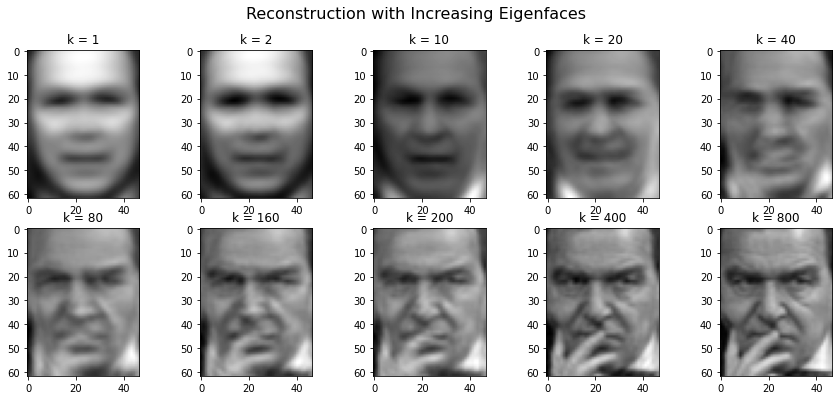

In [ ]:
# from _typeshed import NoneType
fig, axs = plt.subplots(2,5,figsize=(15,6))
for k, i in zip([0,1,9,19,39,79,159,199,399,799],np.arange(10)):
    # Reconstruct the first picture '1a.jpg' whose index is 0.
    # weight = np.dot(faces_norm.T,efacesVectors[:, :k]) # Get PC scores of the images
    # projected_face = np.dot(efacesVectors[:, :k], weight.T)[0] # Reconstruct first face in dataset using k PCs
    weight = faces_norm[1,:].dot(eigen_vecs[:,:k])
    projected_face = weight.dot(eigen_vecs[:,:k].T)
    ax = plt.subplot(2,5,i+1)
    ax.set_title("k = "+str(k+1))
    plt.imshow(projected_face.reshape(62,47)+mean_face.reshape(62,47),cmap='gray');
fig.suptitle(("Reconstruction with Increasing Eigenfaces"), fontsize=16);

# Another Approach

# Turk and Pentland Trick

In actual Analysis of PCA , we compute the covariance matrix as

$\Sigma = \Psi_{n\times m}^\top \Psi_{m\times n}$ such that the dimension of $\Sigma$ will be $n\times n$

If each image is of size $256 \times 256$ then the computation of covariance matrix will be HUGE. Hence instead of calculating $\Psi^\top \Psi$ we calculate here $L = \Psi\Psi^\top$ such that the size of $L$ will be $m\times m$ which is generally very lesser than $n=256\times 256 = 65536$ dimension.

So we calculate

$L_{m\times m}=\Psi\Psi^\top$

Now , if $u$ is the eigen vector of $L$ then $\Psi^\top u$ will be the eigen vector of $\Sigma$

Proof:

$Lu = \lambda u$

$\Psi\Psi^\top u = \lambda u$

$ \Psi^\top (\Psi\Psi^\top u) = \Psi^\top \lambda u$

$ (\Psi^\top \Psi) \Psi^\top u = \lambda \Psi^\top u$

let, $v = \Psi^\top u$

$\implies$ $ (\Psi^\top \Psi) v = \lambda v$

Now, $\Sigma = \Psi^\top \Psi$

So, $\Sigma v = \lambda v$

or, $\Sigma \Psi^\top u = λ \Psi^\top u$

So, we compute the covariance matrix $L = \Psi\Psi^\top$ then calculate the eigenvector $u$ of $L$. Then find the actual eigenvector of $\Sigma = \textbf{v}$  as

$\textbf{v} = \Psi^\top \textbf{u}$



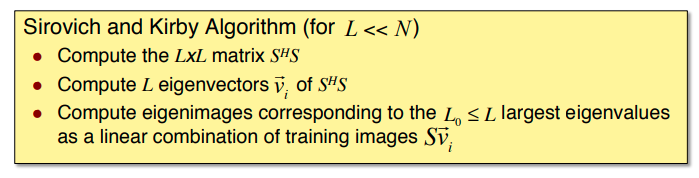

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


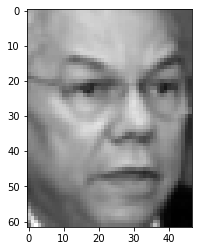

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
plt.grid(False)
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)
plt.imshow(faces.images[0],cmap='gray')
m = faces.images.shape[0]
n = faces.images.shape[1]*faces.images.shape[2]

(1348, 2914)

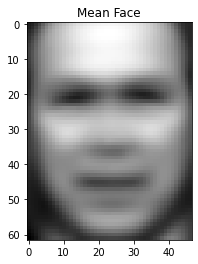

In [ ]:
X = faces.images.reshape(faces.images.shape[0],faces.images.shape[1]*faces.images.shape[2])
X = X.T # Arrange X in shape = n,m
# n = no. of features/pixels, m = no. of samples
x = faces.images.shape[1]
y = faces.images.shape[2]
mean_face = np.mean(X, axis = 1)
plt.imshow(mean_face.reshape(x, y),cmap='gray');
plt.title('Mean Face')

### normalization
faces_norm = np.array(X.T - mean_face)
faces_norm.shape

Text(0.5, 0.98, 'Mean Subtracted Faces')

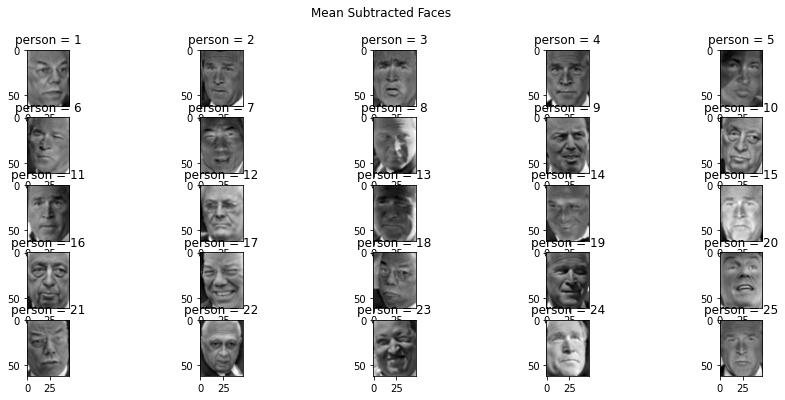

In [ ]:
fig,axs = plt.subplots(2,5,figsize=(15,6))
for i in np.arange(1,26,1):
  ax = plt.subplot(5,5,i)
  ax.set_title("person = "+str(i))
  plt.imshow(faces_norm[i-1,:].reshape(x,y),cmap='gray')

fig.suptitle('Mean Subtracted Faces')

In [ ]:
L = np.dot(faces_norm, faces_norm.T)/(m - 1) #Shirovich ,Kirby Trick
print(L.shape) # shape = m,m m = no.of samples
n=X.shape[0] # no. of features
eigen_vecs, eigen_vals, _ = np.linalg.svd(L)
# idx = eigen_vals.argsort()[::-1]
# eigen_vecs = eigen_vecs[idx]
# eigen_vals = eigen_vals[idx]
print(eigen_vecs.shape) # shape = m,m

u = np.dot(faces_norm.T, eigen_vecs) #  , Shape = n,m , perform face_norm x eigen_Vecs
k= 800 # no. of PCs
pc = u[:,:k] # Shape = n,k

# Normalization of EigenVector is must
for i in range(k):
  pc[:,i] = pc[:,i]/np.linalg.norm(pc[:,i])



(1348, 1348)
(1348, 1348)


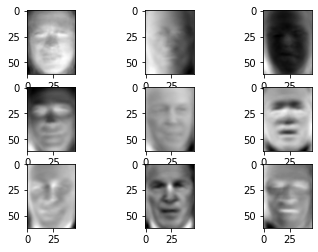

In [ ]:
# EigenFaces
EfaceVectors = np.dot(eigen_vecs.T, faces_norm)# shape = n x m , Eigenvectors are in col

EfaceImages = EfaceVectors[:k, :].reshape(k, x, y)

samples=9

fig = plt.figure(figsize=(6,4))
for i in np.arange(1,samples+1,1):
  plt.subplot(round(np.sqrt(samples)),round(np.sqrt(samples)),i)
  plt.grid(False)
  plt.imshow(EfaceImages[i-1],cmap='gray')

# Single Image Reconstruction

Weights are calculated for each image as

\begin{align}\textbf{w} = {\Psi}^\top \textbf{V}\end{align}

$\Psi$ contains all mean subtracted images along columns. hence transposed. And then projected on to the eigenvectors.

After getting the weights we can then reconstruct the image by the help of weights and basis vectors. here basis vectors are nothing but the eigenvectors. For reconstruction we need weighted linear combination of eigenvectors. Say image $x^{(1)}$ is projected on the eigenspace ( a space made of eigenvectors) and $\textbf{w}^{(1)}$ weights are generated. If there are $k$ components then there will be definitely $k$ no. of elements in $\textbf{w}^{(1)}$. such as

\begin{align}\textbf{w}^{(1)} = [{w_1}^{(1)},{w_2}^{(1)},...,{w_k}^{(1)}]\end{align}
$\mathbf{w}^{(1)}$ is the weight vector associated with $x^{(1)}$

Now we have the eigenvector matrix as
\begin{align}
\textbf{V}_{n\times k}=[\textbf{v}^{(1)},\textbf{v}^{(2)},...,\textbf{v}^{(k)}]
\end{align}

where, $\textbf{v}^{(1)}$ is a column vector of size $n\times 1$, i.e. $\textbf{v}^{(1)} = \begin{bmatrix} v_1^{(1)}\\ v_2^{(1)}\\ \vdots \\v_n^{(1)} \end{bmatrix}$

For reconstruction of single image $x^{(1)}$ we need the following linear combination as

\begin{align}r^{(1)} = w^{(1)}_1 \mathbf{v}^{(1)}+w^{(1)}_2 \mathbf{v}^{(2)}+w^{(1)}_3 \mathbf{v}^{(3)}+\cdots  +w^{(1)}_k \mathbf{v}^{(k)} + mean
\end{align}

For example consider the following simple calculation
Say (2,1) is a vector in 2D space where x y are the two coordinates ; act like basis vectors (1,0) for x  and (0,1) for y. now the vector (2,1) is projected on both x and y ; in result we get two weights for this sample vector (2,1). projecting on x gives weight = 2 and projecting on y gives weight = 1.
\begin{align}\mathbf{w}=[w_1, w_2]=[2, 1]\end{align}


Now to reconstruct theoriginal sample vector (2,1) we need the following linear combination

\begin{align} w_1 \begin{pmatrix}1\\0\end{pmatrix}\end{align}





-1143.0278


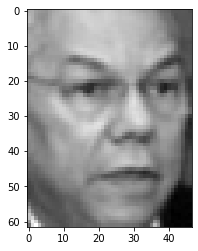

In [ ]:
rec = np.zeros((n,1))
#proj = (faces_norm[:,1].T.dot(pc)).reshape(k,1)
## Now project the mean subtracted image vector on eigenspace (i.e.on pc) to get the weights
weights = np.dot(faces_norm, pc) # Shape of pc = n,k. Shape of faces_norm = n,m, Shape of proj = m,k
#rec =  mean_face + pc.dot(weights.T)
print(weights[0,0])
# Calculation of Linear Combination
#for i in range(k):
 # rec += None

rec = mean_face + np.dot(pc, weights[0])# Add mean face
R = rec.reshape(faces.images.shape[1],faces.images.shape[2])
plt.imshow(R,cmap='gray')

# Vary the number of Principal Components by changing the value of k and observe the change in reconstruction

# Instead of single image reconstruction TRY to reconstruct 10 images